# Flickr REST API: Get information from photos, get and plot photos

## Libraries and Settings

In [1]:
# Libraries
import os
import random
import fnmatch
import pandas as pd
import urllib.request
from flickrapi import FlickrAPI
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Settings
import warnings
warnings.filterwarnings("ignore")

# Read API key and secret (get one on: https://www.flickr.com/services/apps/create/apply/)
with open('flickr_api_key.txt', 'r') as f:
    lines = f.readlines()
    api_key = lines[1].strip()
    secret_key = lines[4].strip()

# Current working directory
print(f'Current working directory: {os.getcwd()}')

Current working directory: /Users/sivanujanselvarajah/Documents/zhaw/4.Semester/Scientific programming/scientific_programming/Week_07/exercises


## Flickr WEB API Settings

In [2]:
# Keys for flickr API
FLICKR_PUBLIC = api_key
FLICKR_SECRET = secret_key

# Settings (extras = different resolution of photos)
flickr = FlickrAPI(FLICKR_PUBLIC, FLICKR_SECRET, format='parsed-json')
extras = 'url_sq,url_t,url_s,url_q,url_m,url_n,url_z,url_c,url_l,url_o'

# Get information about photos using the flickr API
cont = flickr.photos.search(text='yellow flowers', per_page=5, extras=extras)
photos = cont['photos']

# Object type
print(type(photos))

# Print keys of dictionary
print(photos.keys())

# Print values
df = pd.DataFrame.from_dict(photos)
df

<class 'dict'>
dict_keys(['page', 'pages', 'perpage', 'total', 'photo'])


,page,pages,perpage,total,photo
0,1,44428,5,222137,"{'id': '53643096210', 'owner': '196756851@N03'..."
1,1,44428,5,222137,"{'id': '53641775092', 'owner': '196699182@N07'..."
2,1,44428,5,222137,"{'id': '53642796113', 'owner': '91486426@N00',..."
3,1,44428,5,222137,"{'id': '53642971795', 'owner': '135924873@N02'..."
4,1,44428,5,222137,"{'id': '53641605432', 'owner': '200425119@N03'..."


## Get info about photos

In [3]:
# Derive information about the first photo
photo_01 = photos["photo"][0]

try:
    from pprint import pprint
    pprint(photo_01)
except:
    print(photo_01)

{'farm': 66,
 'height_c': 500,
 'height_l': 640,
 'height_m': 313,
 'height_n': 200,
 'height_o': 3760,
 'height_q': 150,
 'height_s': 150,
 'height_sq': 75,
 'height_t': 63,
 'height_z': 400,
 'id': '53643096210',
 'isfamily': 0,
 'isfriend': 0,
 'ispublic': 1,
 'owner': '196756851@N03',
 'secret': 'cf781dba28',
 'server': '65535',
 'title': 'Spring dream',
 'url_c': 'https://live.staticflickr.com/65535/53643096210_cf781dba28_c.jpg',
 'url_l': 'https://live.staticflickr.com/65535/53643096210_cf781dba28_b.jpg',
 'url_m': 'https://live.staticflickr.com/65535/53643096210_cf781dba28.jpg',
 'url_n': 'https://live.staticflickr.com/65535/53643096210_cf781dba28_n.jpg',
 'url_o': 'https://live.staticflickr.com/65535/53643096210_8c4eb03a13_o.jpg',
 'url_q': 'https://live.staticflickr.com/65535/53643096210_cf781dba28_q.jpg',
 'url_s': 'https://live.staticflickr.com/65535/53643096210_cf781dba28_m.jpg',
 'url_sq': 'https://live.staticflickr.com/65535/53643096210_cf781dba28_s.jpg',
 'url_t': 'https

## Download and plot photos

### Single photo

In [12]:
# Photo url
url = photo_01["url_m"]
url

'https://live.staticflickr.com/65535/53635409040_55481db607.jpg'

In [13]:
# Download single photo
urllib.request.urlretrieve(url, 'photo_01.jpg')

('photo_01.jpg', <http.client.HTTPMessage at 0x131481420>)

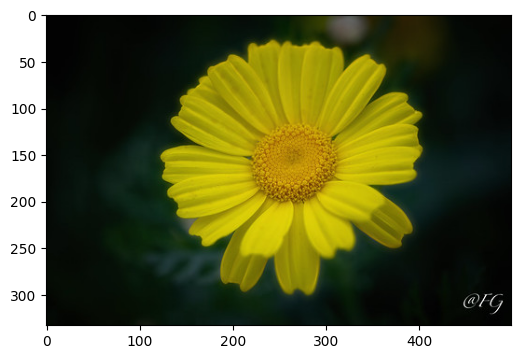

In [8]:
# Plot photo
img = mpimg.imread('photo_01.jpg')
plt.figure(figsize=(6,6))
imgplot = plt.imshow(img)

### Function to print all photos from the list

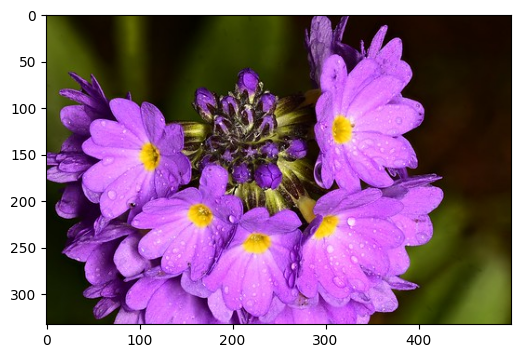

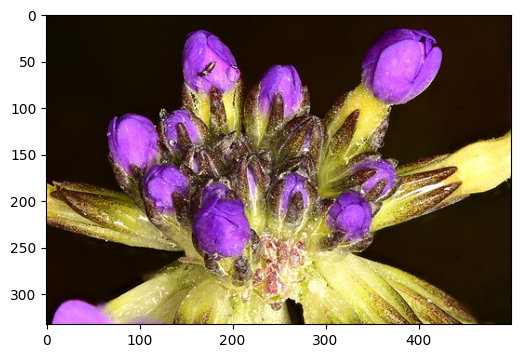

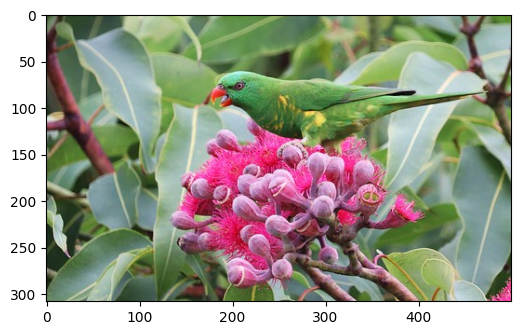

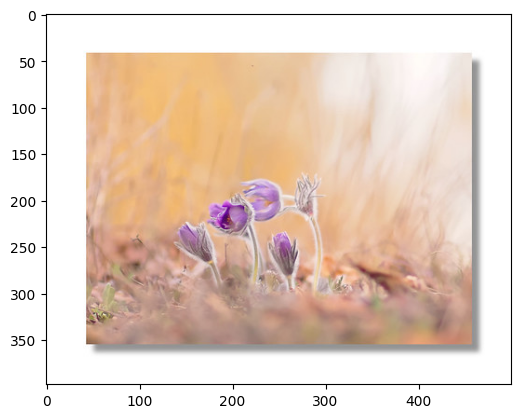

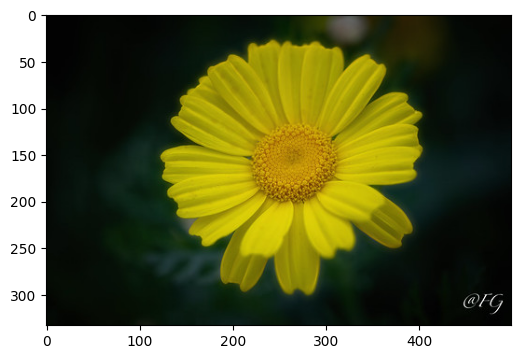

In [9]:
def print_photos():

    for photo in photos["photo"]:
        try:
            # Url
            url = photo["url_m"]
            # Download
            urllib.request.urlretrieve(url, 'photo.jpg')
            # Plot
            img = mpimg.imread('photo.jpg')
            plt.figure(figsize=(6,6))
            imgplot = plt.imshow(img)
        except:
            pass

# Funtion call
print_photos()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [10]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.3.0
Datetime: 2024-04-06 11:36:10
Python Version: 3.10.13
-----------------------------------
